In [151]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import time
import random

In [29]:
#c_subset = {key: c_devel[key] for key in unseen_words}
#c_subset.most_common(3)
def do_subset(counter, lst):
    return Counter({k: counter.get(k, 0) for k in lst})

c_subset = do_subset(c_devel, unseen_words)
del c_subset["\n"]
most_unseen = [item[0] for item in c_subset.most_common(3)]
grouped_filtered_list_devel = list(filtered_list_devel for filtered_list_devel,_ in itertools.groupby(filtered_list_devel))

Counter([token for token in grouped_filtered_list_devel if token[0] in most_unseen])




Counter({('Yeargin', 'NNP'): 37,
         ('Scoring', 'NNP'): 13,
         ('ringers', 'NNS'): 21})

In [4]:
import numpy as np
train_file = "ted-train.txt"

def read(fname, max_lines=np.inf):
    """
    Reads in the data in fname and returns it as
    one long list of words. Also returns a vocabulary in
    the form of a word2index and index2word dictionary.
    """
    data = []
    # w2i will automatically keep a counter to asign to new words
    w2i = defaultdict(lambda: len(w2i))
    i2w = dict()
    start = "<s>"
    end = "</s>"
    
    with open(fname, "r") as fh:
        for k, line in enumerate(fh):
            if k > max_lines:
                break
            words = line.strip().split()
            # assign an index to each word
            for w in words:
                i2w[w2i[w]] = w # trick
            
            sent = [start] + words + [end]
            data.append(sent)

    return data, w2i, i2w

In [118]:
def train_ngram(corpus, N, k=0):
    start_time = time.time()
    """
    Trains an n-gram language model with optional add-k smoothing
    and additionaly returns the unigram model
    
    :param data: text-data as returned by read
    :param N: (N>1) the order of the ngram e.g. N=2 gives a bigram
    :param k: optional add-k smoothing
    :returns: ngram and unigram
    """
    flat_corpus = [item for sublist in corpus for item in sublist]
    #ngram = defaultdict(Counter) #ngram[history][word] = #(history,word)
    # ngram = defaultdict(lambda: k/(N+kV), ngram)
    unigram = defaultdict(float, Counter(flat_data)) # default prob is 0.0           

    ## YOUR CODE HERE ##
    total_sum = sum(unigram.values())
    for w, v in unigram.items():
        unigram[w] = v/total_sum
    
    print("time to create the 1-gram: ", time.time() - start_time)
    #create the history for each n-gram made of n-1 words
    #history = Counter(tuple(window(flat_corpus, size=N-1)))
    print("time to create histories: ", time.time() - start_time)
    # nested dictionary to associate to each gram a word
    counter_model = defaultdict(lambda: defaultdict(int))
    probability_model = defaultdict(lambda: defaultdict(lambda: 0))
    # add padding at the beginnning and counting words for each history
    for sentence in corpus:
        for i in range(N-2):
            sentence.insert(0, "<s>")
            sentence.append("</s>")
        
        n_grams = tuple(window(sentence, size=N))
        
        for item in n_grams:
            history, word = tuple((item[:-1],item[-1]))
            counter_model[history][word] += 1
    #print(len(list(model.items())))
    #print(corpus[:2])
    print("time for couting words for each history: ", time.time() - start_time)
    # calculate probability with add-k method
    counter = 0
    for history in counter_model:
        total_count = float(sum(counter_model[history].values())) 
        default_value = ((counter_model[history][word] + k) / (total_count + k*len(unigram)))
        probability_model[history] = defaultdict(lambda: default_value, probability_model[history])
        for word in counter_model[history]:
            probability_model[history][word]
            if counter < 10:
                if counter == 1:
                    print(probability_model[history].values())
                print("model[history][word]", model[history][word])
                #print("total_count", total_count)
                print("default_value", default_value)
                counter += 1
        #model = defaultdict(lambda: defaultdict(lambda: 0)
        # ngram = defaultdict(lambda: k/(N+kV), ngram)
        #for word in model[history]:
        #    model[history][word] = (model[history][word] + k) / (total_count + k*len(unigram))
        #unseen_words = list(set(list(unigram.keys())) - set(list(model[history])))
        #for w in unseen_words:
            #model[history][word] = k / (total_count + k*len(unigram)) 
            
    
    print("time to train the N-gram: ", time.time() - start_time)
    return probability_model, unigram

#data, w2i, i2w = read(train_file)
#bigram, unigram = train_ngram(data, N=2, k=0)
#bigram_smoothed, unigram_smoothed = train_ngram(data, N=4, k=1)


In [89]:
def generate_sent(lm, N=2):
    ## YOUR CODE HERE ##
    
    sentence_finished = False
    sentence = ['<s>']*(N-1)
    
    while not sentence_finished:
        # keep on genereating words
        history = tuple(sentence[1-N:])
        # print(history)
        sample_word = sampleGram(lm, history)
        
        if sample_word is None: # draw random worn from list of unseen words
            sentence_finished = True
            
        sentence.append(sample_word)
        #print(sentence)
        if sentence[1-N:] == ["</s>"]*(N-1): # the sentence is finished
            sentence_finished = True
        
            
    return sentence
    
def sampleGram(model, history):
    u = random.random() # uniformly random number between 0 and 1
    p = 0
    
    for item in dict(model[history]).items():
        p += item[1]
        if p > u: 
            return item[0]


#data, w2i, i2w = read(train_file)
#bigram, unigram = train_ngram(data, N, k=0)
#bigram_smoothed, unigram_smoothed = train_ngram(data, N, k=1) 

#generate_sent(bigram, N=4)

[' '.join([str(elem) for elem in generate_sent(bigram, N=4)]) for i in range(5)]



['<s> <s> <s> People talk to me and ask me that question with the word "marathon"? So we had to do . </s> </s> </s>',
 '<s> <s> <s> We do this all the time . </s> </s> </s>',
 '<s> <s> <s> JPL we heard this morning , one of the four walls of the CIA in Langley , Virginia , and decided that , well , this is amazing , and every unit of energy you save at the wheels is stuck , is not simply critical to our economy ? And people said , "Aimee , you know , 50 meters can be a demographic disaster . </s> </s> </s>',
 "<s> <s> <s> They 'd had to pull my body out and bring me back . </s> </s> </s>",
 '<s> <s> <s> When you change your lifestyle to minimize the distance . </s> </s> </s>']

In [91]:
"""history = random.choice(list(bigram.keys()))
print(list(dict(bigram[history]).values()))
print(sum(list(dict(bigram[history]).values())))"""
#print(sampleGram(bigram_smoothed, history))
#print(Counter([sampleGram(bigram_smoothed, history) for i in range(100)]))
bigram

defaultdict(<function __main__.train_ngram.<locals>.<lambda>()>,
            {('<s>',
              '<s>',
              '<s>'): defaultdict(<function __main__.train_ngram.<locals>.<lambda>()>, {'Here': 0.004932284315786312,
                          'To': 0.0019744151827272454,
                          'Both': 0.00024398666706705504,
                          'Consider': 0.00014263835920843218,
                          'I': 0.06672847662232366,
                          'Facit': 1.1260923095402541e-05,
                          'They': 0.024079607219002434,
                          'Everybody': 0.0006155971292153389,
                          'And': 0.1431938980811387,
                          'In': 0.01648974505270112,
                          'and': 0.0009196420527912075,
                          'Gone': 2.2521846190805082e-05,
                          'But': 0.043868802738656495,
                          'A': 0.006287348728266418,
                          'Let': 0.00453439

### [Extra]

For how many of the histories $w_{k-N+1}\dots w_{k-1}$ is the number of continuations $w_n$ equal to **one**? Calculate the percentage of such cases for the different orders *N*.

And which history has the **most possible continuations**?

In [ ]:
len(bigram)
#len[value for history, word in bigram.items() for value, probability in history.items() if probability == 1]
count = 0
for history in bigram.keys():
    print(len(bigram[history]))
    if count == 10:
        count += 1

"""count = 0
for history in bigram[history]:
    print(model[history])
    break
    for word in model[history]:
        print(word)
        break
        if word[1] == 1:
            
            count += 1
count"""

9058
38
15
10
3
1
1
1
1
1
2
1
6
28
80
39
3
36
1
1
4
3
1
1
1
1
1
1
166
5
1
2
3
5
1
1
1
1
1
1
5
7
1
4
1
1
1
1
1
4
1
1
31
8
1
1
5
137
17
102
4
4
11
26
16
16
1
1
15
1
1
1
808
338
43
1
1
5
5
2
1
1
3
1
1
6
1
1
1
744
252
1
1
1
9
1
1
1
12
438
9
9
2
1
1
1
1
128
1
1
75
1
1
1
1480
101
8
1
1
1
7
1
1
1
1
2
1
1
1
1
1
81
1
1
669
4
1
22
2
13
5
1
1
1
1
124
5
114
1
1
1
3
1
1
13
61
2
1
1
2
1
1
1
1
3
1
1
1
45
1
1
1
1
1
1
1
1
2
1
3
23
1
1
1
1
1
1
1
2
1
1
792
1
1
1
2
1
1
1
1
681
26
6
6
15
21
13
1
1
1
1
1
1
1
14
134
6
5
1
1
1
3230
9
1
1
1
1
79
1
1
1
1
1
2
1
1
1
1
1
2
1
1
1
1
154
14
1
1
2
2
3
1
2
1
1
2
1324
1
2
2
1
5
1
4
4
11
1
1
2
2
1
8
1
1
1
1
674
142
1
1
2
52
1
10
1
1
1
1
1
1
2
1
1
1
1
1
2
1
1
1
1
1
16
6
5
1
1
1
1
8
12
226
23
131
6
2
16
1
1
1
1
5
1
1
1
1
6
6
26
1
1
1
1
76
6
12
1
152
52
1
1
1
1
2
1
1
3
1
1
1
26
3
14
635
1003
149
1
1
1
779
150
1
1
1
2
1
5
1
1
1
1
1
1
1
1
1
355
1
2
1
26
91
6
1
1
1
1
1
1
1
1
2
1
1
1
2
1
1
1
1
4
26
1
1
1
1
2
1
1
1
1
2
2
14
1
1
876
69
25
35
1
2
1
1
1
1
82
85
36
3
13
2
1
178
25
7

## Excercise 2.3 (5 points)

Let $V$ denote our vocabulary. Recall that for any $w$ in $V$ `bigram[w]` defines a conditional probability $p(v|w)$ over $v$ in $V$. In the case of an **unsmoothed bigram**, $p(v|w) = 0$ for most $v\in V$, whereas in the **smoothed bigram** smoothing took care that $p(v|w) \geq 0$ for *all* $v$.

The function `plot_bigram_dist(word, bigram, smoothbigram, k=30)` plots shows $p(v|word)$ for the `k` words $v$. One bar shows the probabilities in `bigram` and one in `smoothbigram`. 

**(a)** Use this function to plot the distribution for at least two words `w` and answer the questions
* What is the effect of smoothing on the bigram distribution of frequent words? 
* What is the effect in the case of infrequent words?
* Explain the difference between the two based on the raw counts of `w` 

**(b)** Now experiment with $k$ much smaller than 1 (but greater than 0!) 
* What are the effects?


**[Hint]** Remember that add-1 smoothing turns 
$$P(w_n\mid w_{n-1}) = \frac{C(w_{n-1}w_{n})}{C(w_{n-1})}$$
into
$$P_{add-1}(w_n\mid w_{n-1}) = \frac{C(w_{n-1}w_{n}) + 1}{C(w_{n-1}) + |V|}.$$

What happens when $C(w_{n-1})$ is relatively big (similiar in of size as $ |V| $)? And what if $C(w_{n-1})$ is small? 

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_bigram_dist(word, bigram, smoothbigram, k=30):
    d = bigram[word]
    ds = smoothbigram[word]
    
    # sort the probabilities
    d_sort = sorted(d.items(), reverse=True, key=lambda t: t[1])[0:k]
    ds_sort = sorted(ds.items(), reverse=True, key=lambda t: t[1])[0:k]
    
    _, probs = zip(*d_sort)
    smooth_ws, smooth_probs = zip(*ds_sort)
    
    # make up for the fact that in the unsmoothed case  probs is generally less than k long
    probs = probs + (0,) * (k-len(probs)) 

    w_data = pd.DataFrame({"w": smooth_ws * 2,
                           "P({}|w)".format(word): probs + smooth_probs,
                           "smoothing": ["unsmoothed"]*k + ["smoothed"]*k})
    
    fig, ax = plt.subplots(figsize=(10,10))
    plt.xticks(rotation=90)
    g = sns.barplot(ax=ax, x="w", y="P({}|w)".format(word), hue="smoothing",
                    data=w_data, palette="Blues_d")    

In [143]:
data, w2i, i2w = read(train_file)
bigram, unigram = train_ngram(data, N=3, k=0)
bigram_smoothed, unigram_smoothed = train_ngram(data, N=3, k=1)

42


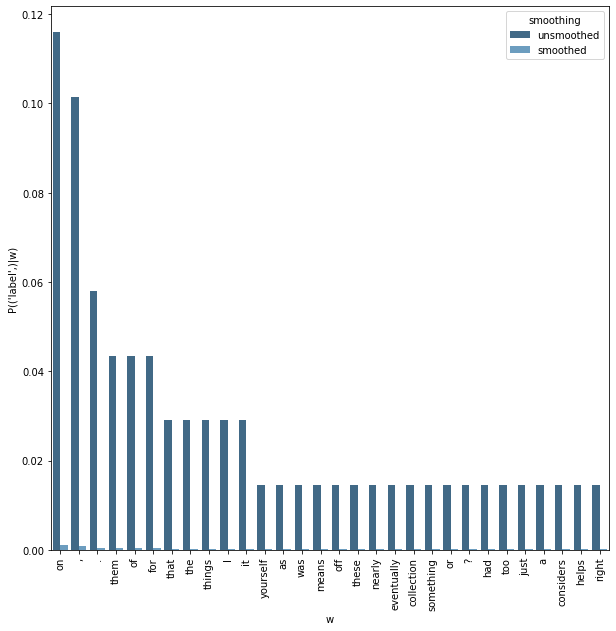

In [113]:
## YOUR CODE HERE ##
#word = ('the',) # with frequent words small effects
#word = ('label',) # stronger effect
# since we are adding V in the denominator less frequent words willl result in having a lower probability and more penalized
print(len(list(bigram[word])))
plot_bigram_dist(word, bigram, bigram_smoothed)

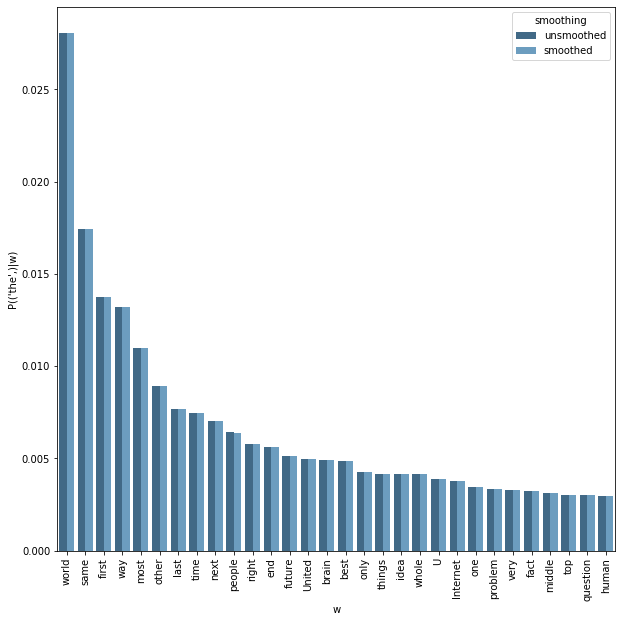

In [115]:
data, w2i, i2w = read(train_file)
bigram1, unigram1 = train_ngram(data, N=2, k=0)
bigram_smoothed1, unigram_smoothed1 = train_ngram(data, N=2, k=0.001)


YOUR ANSWERS HERE

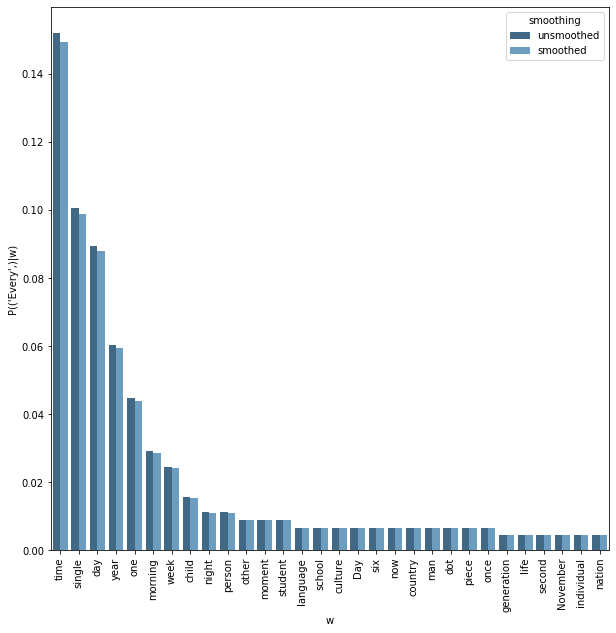

In [127]:
#word = ('the',) # almost no effect
word = ('Every',) # smaller effect and better proportioned
plot_bigram_dist(word, bigram1, bigram_smoothed1)


**Recall** that if we have a sentence $w_1,\dots,w_n$ we can write

$$P(w_1\dots w_n) = P(w_1)P(w_2|w_1) \cdots P(w_i|w_1 \dots w_{n-1}) \approx P(w_1)P(w_2|w_1)\cdots P(w_{N-1}|w_1\dots w_{N-2})\prod_{i=N}^{n} P(w_i|w_{i-(N-1)}\dots w_{i-1})$$

where in the last step we make an $N$-gram approximation of the full conditionals.

For example, in the case of a bigram (N=2), the above expression reduces to

$$P(w_1 \dots w_n)\approx P(w_1)\prod_{i=2}^{n} P(w_i| w_{i-1}).$$

## Exercise 2.4 (5 points)

The following sentences are taken from the **training data**. Use your **unsmoothed unigram**, **bigram**, and **trigram** language model to estimate their **probabilities**:

    1. Every day was about creating something new .
    2. In this machine , a beam of protons and anti-protons are accelerated to near the speed of light and brought 
       together in a collision , producing a burst of pure energy .

**Repeat** this with the **smoothed (add-1)** versions of the N-grams. What is the effect of smoothing on the probabilities?


In [134]:
## YOUR CODE HERE ##
def window(iterable, size=2):
    i = iter(iterable)
    win = []
    for e in range(0, size):
        win.append(next(i))
    yield tuple(win)
    for e in i:
        win = win[1:] + [e]
        yield tuple(win)


sentence1 = "Every day was about creating something new ."
sentence2 = "In this machine , a beam of protons and anti-protons are accelerated to near the speed of light and brought together in a collision , producing a burst of pure energy ."

def sentProb(lm, sentence):
    n_grams = tuple(window(sentence.split(), size=N))
    P = 1
    for item in n_grams:
        history, word = tuple((item[:-1],item[-1]))
        #print(bigram[history][word])
        P *= bigram[history][word] 
    return P
    
    
print(sentProb(bigram, sentence1))
print(sentProb(bigram, sentence2))

    




3.033151810718131e-14
1.2225752266819959e-70


YOUR ANSWERS HERE

## Exercise 2.5 (5 points)

The above sentences were taken from the training set, hence they will all have probability greater than 0. The big challenge for our language model are of course with sentence that contain unseen N-grams: if such an N-gram occurs our model immediately assigns the sentence probability zero.

The following three senteces are taken from the **test set** availlable in the file **ted-test.txt**. What probabilities do your smoothed and unsmoothed language models asign in this case?

    1. Because these robots are really safe .
    2. We have sheer nothingness on one side , and we have this vision of a reality that encompasses every 
       conceivable world at the other extreme : the fullest possible reality , nothingness , the simplest possible 
       reality .

In [144]:
### YOUR CODE HERE ###
sentence3 = "Because these robots are really safe ."
sentence4 = "We have sheer nothingness on one side , and we have this vision of a reality that encompasses every conceivable world at the other extreme: the fullest possible reality , nothingness , the simplest possible reality ."

print("first sentence", sentProb(bigram, sentence3))
print("second sentence", sentProb(bigram, sentence4))

print("first sentence smoothed", sentProb(bigram_smoothed, sentence3))
print("second sentence smoothed", sentProb(bigram_smoothed, sentence4))

first sentence 0.0
second sentence 0.0
first sentence smoothed 0.0
second sentence smoothed 0.0


YOUR ANSWERS HERE

### [Extra]

**Optional** What percentage of the sentences in the test set get assigned probability 0 under your smoothed and unsmoothed language models? 

In [29]:
### ANSWER HERE ###


## Exercise 2.6 (5 points)

**Perplexity** is a frequently used **metric** for evaluating probabilistic models such as language models. The perplexity (sometimes called **PP** for short) of a language model on a sentence is the **inverse probability** of the sentence, **normalized** by the number of words:

$$PP(w_1 \dots w_n) = P(w_1\dots w_n)^{-\frac{1}{n}}.$$

Here we can again approximate $P(w_1 \dots w_n)$ with N-gram probabilities, as above.
Note: $(x_1\cdots x_n)^{-\frac{1}{n}}$ is the **geometric mean** of the numbers $x_1,\dots,x_n$. It is like the (regular) artithmetic mean, but with **products** instead of **sums**. The geometric mean is a more natural choice in the case of *PP* because behind $P(w_1\dots w_n)$ is a series of $n$ products ([more here](https://en.wikipedia.org/wiki/Geometric_mean)).



Compute the perplexity of the training sentences from excercise 2.1. What big difference between the **probabilities** of the sentences and the **perplexities** of the sentences do you notice?

In [30]:
### YOUR CODE HERE ###